<a href="https://colab.research.google.com/github/nikhita0304/Main-FLow/blob/main/internship_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install libraries
#!pip install pandas numpy matplotlib seaborn scikit-learn



In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### load the dataset


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/house_prices.csv')
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
     Size Location  Number of Rooms     Price
0  1649.0    rural              3.0  258039.0
1  1458.0    rural              4.0  284539.0
2  1694.0    urban              2.0  316563.0
3  1956.0    rural              5.0  348777.0
4  1429.0    rural              3.0  276041.0


## dataset info

In [ ]:
print("\nDataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             28 non-null     float64
 1   Location         30 non-null     object 
 2   Number of Rooms  28 non-null     float64
 3   Price            28 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB
None


### check for missing values


In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Size               2
Location           0
Number of Rooms    2
Price              2
dtype: int64


In [ ]:
data['Size']=data['Size'].fillna(data['Size'].median())
data['Number of Rooms']=data['Number of Rooms'].fillna(data['Number of Rooms'].median())


In [ ]:
upper_limit=data['Price'].quantile(0.95)
data['Price']=np.where(data['Price']>upper_limit,upper_limit,data['Price'])


In [ ]:
data=pd.get_dummies(data,columns=['Location'],drop_first=True)
print("Dataset after encoding:")
print(data.head())


Dataset after encoding:
     Size  Number of Rooms     Price  Location_suburban  Location_urban
0  1649.0              3.0  258039.0              False           False
1  1458.0              4.0  284539.0              False           False
2  1694.0              2.0  316563.0              False            True
3  1956.0              5.0  348777.0              False           False
4  1429.0              3.0  276041.0              False           False


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler()
data[['Size','Number of Rooms']]=scaler.fit_transform(data[['Size','Number of Rooms']])


In [ ]:
X=data.drop('Price',axis=1)
y=data['Price']


## split the dataset into training and testing sets


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
print(f"Training set size : {X_train.shape}")
print(f"Testing set size : {X_test.shape}")


Training set size : (24, 4)
Testing set size : (6, 4)


### Combine X_train and y_train into one DataFrame


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)


### Drop any rows that have NaN in either X or y

In [ ]:
train_data.dropna(inplace=True)


### Separate cleaned data back into X_train and y_train

In [ ]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]


### initialize and train the model

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

### display coefficients

In [ ]:
print("Model Coefficients:",model.coef_)
print("Intercept:",model.intercept_)


Model Coefficients: [-69282.13394238  74593.58519238  36001.20788502 101040.23430923]
Intercept: 270762.00637964264


### make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)


Convert to Series

In [ ]:
y_test = pd.Series(y_test).reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)


### Drop NaNs based on both

In [ ]:
mask = ~(y_test.isna() | y_pred.isna())
y_test = y_test[mask]
y_pred = y_pred[mask]


### evaluate the model

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)


### Combine and drop rows with NaNs in either

In [ ]:
df_eval = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).dropna()


### Evaluate only on non-NaN pairs

In [ ]:
rmse = np.sqrt(mean_squared_error(df_eval['y_test'], df_eval['y_pred']))
r2 = r2_score(df_eval['y_test'], df_eval['y_pred'])


In [ ]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 79190.87
R² Score: -0.41


### scatter plot of actual vs predicted prices

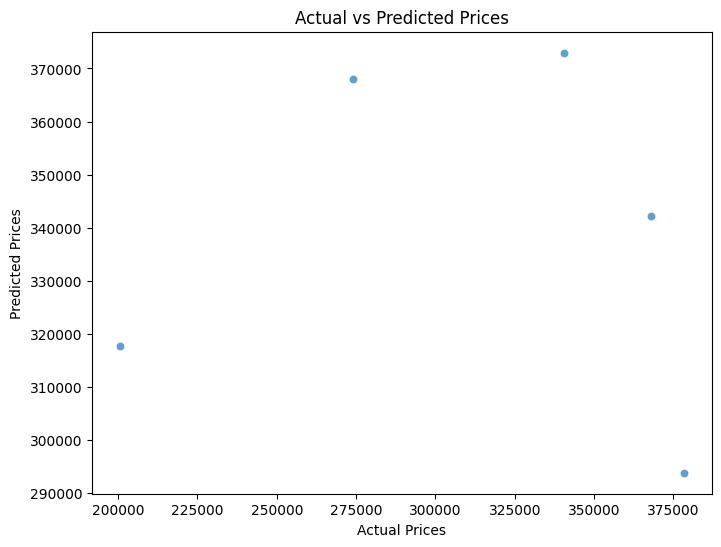

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.7)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## Residual plot

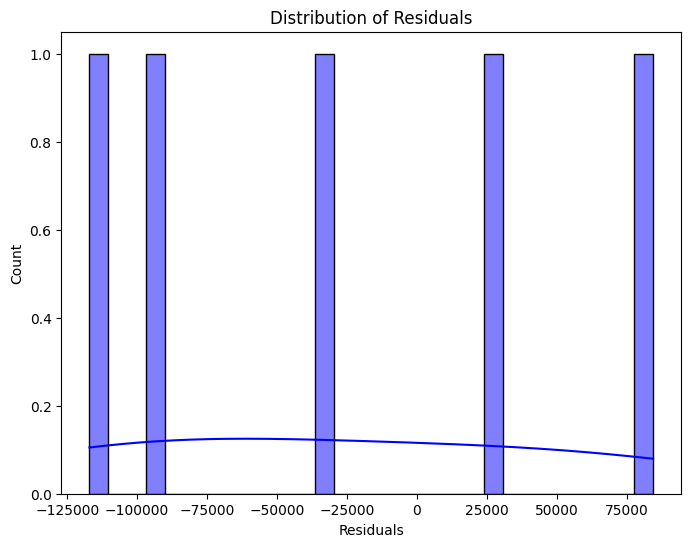

In [ ]:
residuals=y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals,kde=True,bins=30,color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()